Aluno: Luíza Angelo Lovo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

file_path = '/content/drive/My Drive/Lista 2/propaganda (1).csv'

df = pd.read_csv(file_path)

Exercício 1 –  A partir da base de dados propaganda (1).csv Download propaganda (1).csv faça um modelo de regressão múltipla para predizer as vendas:

1 – Análise descritiva

In [16]:
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.shape

(200, 4)

In [18]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
df.isnull().sum()

,0
TV,0
Radio,0
Jornal,0
Vendas,0


2 – Calculo de correlação e covariância

In [20]:
correlation_matrix = df.corr()
print(correlation_matrix)

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.782224
Radio   0.054809  1.000000  0.354104  0.576223
Jornal  0.056648  0.354104  1.000000  0.228299
Vendas  0.782224  0.576223  0.228299  1.000000


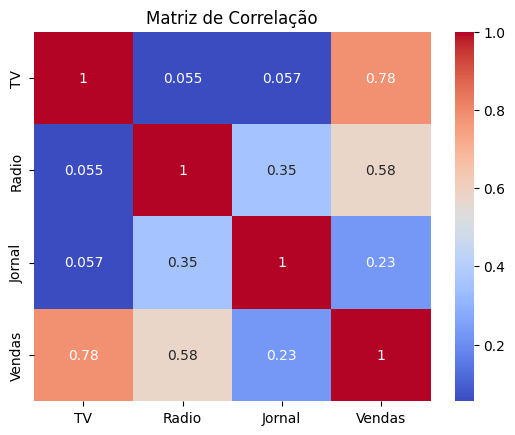

In [21]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [22]:
covariance_matrix = df.cov()
print(covariance_matrix)

                 TV       Radio      Jornal      Vendas
TV      7370.949893   69.862492  105.919452  350.390195
Radio     69.862492  220.427743  114.496979   44.635688
Jornal   105.919452  114.496979  474.308326   25.941392
Vendas   350.390195   44.635688   25.941392   27.221853


3 – Faça o modelo de regressão

In [25]:
X = df[['TV', 'Radio', 'Jornal']]
y = df['Vendas']

In [27]:
X = sm.add_constant(X)

In [28]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.58e-96
Time:                        19:57:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

4 – Realize a análise de resíduos

In [29]:
residuals = model.resid

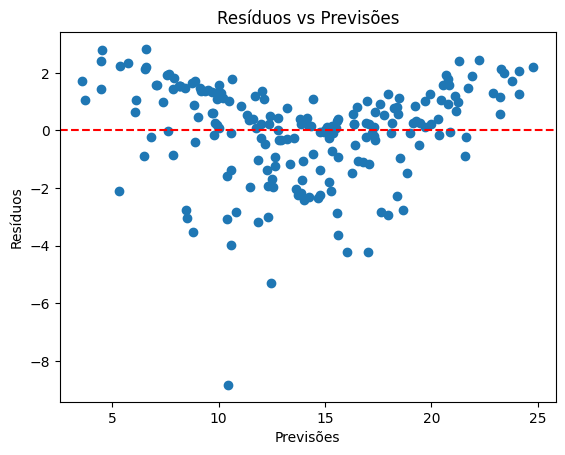

In [30]:
predictions = model.predict(X)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões")
plt.show()

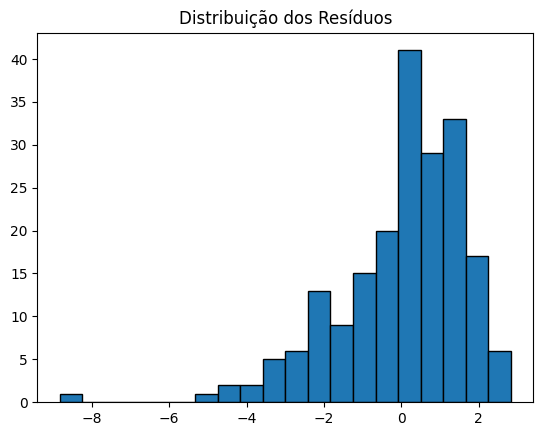

In [31]:
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Distribuição dos Resíduos")
plt.show()

5 – Análise de multicolinearidade

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable       VIF
0    const  6.848900
1       TV  1.004611
2    Radio  1.144952
3   Jornal  1.145187


6 – Análise do Modelo

O modelo ajustado explica 89,6% da variação nas vendas, com TV e Rádio mostrando impacto significativo, enquanto Jornal tem pouco efeito. Não há multicolinearidade significativa, e os resíduos são adequadamente distribuídos, indicando boa qualidade do modelo.